## Code to bring in and downsample the forcings

This code works off the xarray builder code first

In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import time
import xarray as xr

In [9]:
# Define the path to all of the data you want to load
path = '/srv/shared/deep_stac/data/forcings/2017/*2017.nc'
# Make the path a global varaible and make a list of the files 
flist=glob.glob(path)
print(len(flist))

17


In [32]:
ds=xr.open_mfdataset(flist) #dataset
# mf is multiple file dataset 
ds.close()
ds

/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/conventions.py:448: SerializationWarning: variable 'relative_humidity' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  stack_char_dim=stack_char_dim, use_cftime=use_cftime)
/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/conventions.py:448: SerializationWarning: variable 'wind_from_direction' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  stack_char_dim=stack_char_dim, use_cftime=use_cftime)
/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/conventions.py:448: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  stack_char_dim=stack_char_dim, use_cftime=use_cftime)
/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/conventions.py:448: SerializationWarning: variable 'dead_fuel_moisture_1000hr' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  stack_char

ValueError: cannot infer dimension to concatenate: supply the ``concat_dim`` argument explicitly

/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/conventions.py:448: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  stack_char_dim=stack_char_dim, use_cftime=use_cftime)


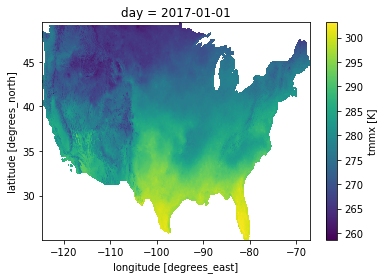

In [33]:
# Working with one dataset is better than many for learning

path1 = '/srv/shared/deep_stac/data/forcings/2017/tmmx_2017.nc'
d1 = xr.open_dataset(path1)
# d1['day'][0]['air_temperature'].plot
d1
temp=d1.air_temperature
temp.isel(day=0).plot()
#day["air_temperature"][0].plot

In [13]:
topo = '/home/jovyan/shared/deep_stac/data/topo.nc'
dstopo = xr.open_dataset(topo)
dstopo.close()
dstopo.expand_dims('time')

<xarray.Dataset>
Dimensions:     (time: 1, x: 17569, y: 17002)
Coordinates:
  * y           (y) float32 4230327.0 4230324.0 ... 4179327.0 4179324.0
  * x           (x) float32 254007.0 254010.0 254013.0 ... 306708.0 306711.0
Dimensions without coordinates: time
Data variables:
    veg_height  (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 17.5 17.5 17.5 17.5
    veg_tau     (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    veg_k       (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    veg_type    (time, y, x) uint32 3294 3294 3294 3294 ... 3033 3033 3033 3033
    dem         (time, y, x) float32 2633.369 2635.3313 ... 3064.8484 3064.3577
    mask        (time, y, x) uint8 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    projection  (time) |S1 b''
Attributes:
    last_modified:       [2019-08-08 17:17:16] Data added or updated
    Conventions:         CF-1.6
    dateCreated:         2019-08-08 17:17:34
    Title:               Topographic Images for S

In [14]:
dstopo

<xarray.Dataset>
Dimensions:     (x: 17569, y: 17002)
Coordinates:
  * y           (y) float32 4230327.0 4230324.0 ... 4179327.0 4179324.0
  * x           (x) float32 254007.0 254010.0 254013.0 ... 306708.0 306711.0
Data variables:
    veg_height  (y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 17.5 17.5 17.5 17.5 17.5
    veg_tau     (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    veg_k       (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    veg_type    (y, x) uint32 3294 3294 3294 3294 3294 ... 3033 3033 3033 3033
    dem         (y, x) float32 2633.369 2635.3313 ... 3064.8484 3064.3577
    mask        (y, x) uint8 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0
    projection  |S1 b''
Attributes:
    last_modified:       [2019-08-08 17:17:16] Data added or updated
    Conventions:         CF-1.6
    dateCreated:         2019-08-08 17:17:34
    Title:               Topographic Images for SMRF/AWSM
    history:             [2019-08-08 17:17:34] Create ne